# <span id="toc">  Esercitazione 10 - parallelizzazione </span>

[  Parallelizzazione - libreria MPI ](#MPI)

[  Modifiche al main ](#main)

[ 10.1 - Le capitali americane ](#ex-10.1)

### Note

i use the SPMD (Single Program Multiple Data) model, there is only one
program and each process uses the same executable working on
different sets of data. (p.23, 24 slides)

MPI p. 31

modificato le funzioni printBL in modo che stampassero su file diversi a seconda del rank

### <span id="MPI">  Parallelizzazione - libreria MPI </span>[^](#toc)


### <span id="main">  Il main </span>[^](#toc)

Il main è diviso in due parti: una di **inizializzazione** del problema, l'altra di esecuzione vera e propria, corrispondende all'**evoluzione** della popolazione.

Nella **prima parte** si inizializzano il generatore di numeri casuali e il Problemset (si generano le città, distribuite su una circonferenza o in un quadrato), si *dà vita* alla prima generazione di individui, e, sulla base dei criteri stabiliti dal Problemset, la si valuta e mette in ordine.

Nella **seconda parte** si cicla sulle generazioni. All'interno di ogni ciclo la popolazione viene fatta **mutare**, poi valutata e infine messa in ordine. Dopodichè i **risultati**, registrati sempre secondo i parametri del problemset, vengono salvati: in una directory `cit` le coordinate delle città associate al *miglior individuo* di ciascuna generazione (può essere facilmente sostituito con l'individuo i-esimo, se lo si desidera); in una directory `bestLen` le lunghezze associate al miglior percorso della generazione attuale, e la media delle lunghezze dei percorsi della metà migliore della popolazione.


### Parametri utilizzati

Ho usato cicli di $500$ generazioni, con numero di individui variabile (vedi dopo), numero di geni $34$ e probabilità di mutazione rispettivamente:  
0.1 (PairPermut)  
0.1 (Invertion)  
0.2 (Shift)  
0.2 (Shift2)  
0.2 (MPermut)  
0.5 (Crossover)  


## <span id="ex-10.1">  Esercizio 10.1 - Le capitali americane </span>[^](#toc)

Adesso applico il codice all'ottimizzazione di un percorso tra $34$ città piazzate casualmente all'interno di un quadrato. Al contrario di prima in linea di principio **non potrò mai sapere se ho trovato il percorso migliore** (a meno di provare tutte le $2.95\times 10^{38}$ permutazioni...).

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

## Exercise 10.2

Apply your code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

Do you improve with respect using one single Continent?

Do you improve with respect using (up to) 10 independent Continents?

### Parallelo senza migrazioni (continenti indipendenti)

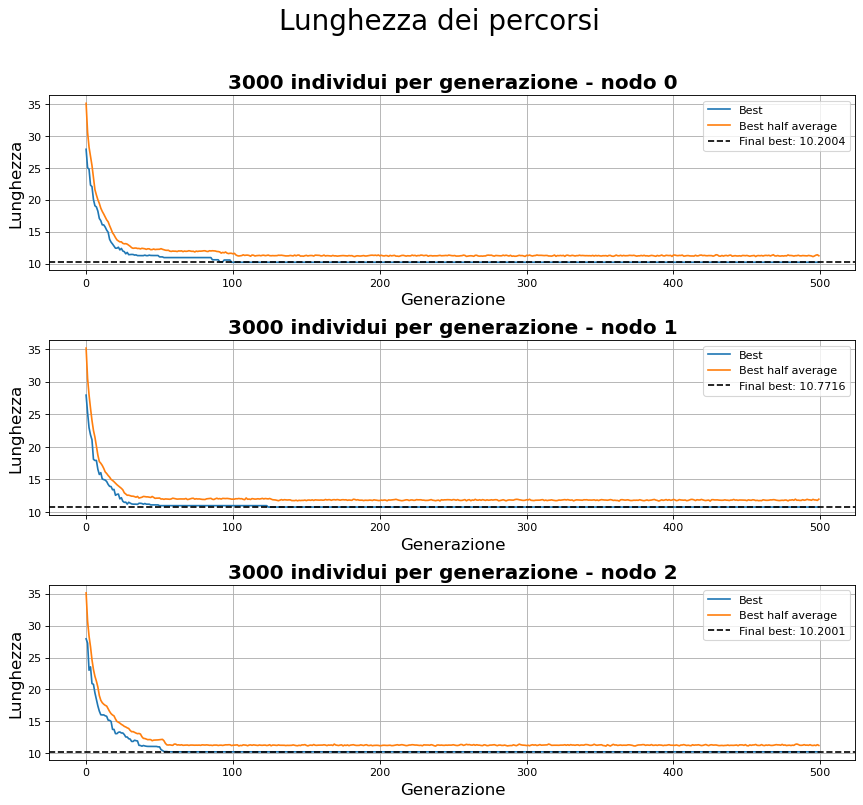

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(13, 11), dpi=80)
plt.suptitle("Lunghezza dei percorsi\n", fontsize = 25)

rank =["0", "1", "2"]

for i in range(0,3):
    # using rank[i] individuals per generation
    plt.subplot(3,1,i+1)
    gen,best = np.loadtxt("ex10/IndCont/bestLen/BL"+rank[i]+".out", usecols=(0,1), delimiter=' ', unpack='true')
    plt.plot(gen, best, marker = "", label = "Best") 
    bestave = np.loadtxt("ex10/IndCont/bestLen/BLAv"+rank[i]+".out", usecols=(1), delimiter=' ', unpack='true')
    plt.plot(gen, bestave, marker = "", label = "Best half average") 
    plt.ylabel('Lunghezza', fontsize =15)
    plt.xlabel('Generazione', fontsize =15)
    plt.grid(True)
    plt.title('3000 individui per generazione - nodo '+rank[i], fontsize = 18, fontweight = "bold")
    plt.axhline(y=best[499], color = "k", linestyle = "--", label = "Final best: "+str(best[499]))
    plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()

### Osservazioni

La curva *best half average* dà un'idea di quanto la popolazione continui a mutare e rimescolarsi anche una volta che il miglior individuo ha raggiunto la *migliore soluzione*: più è seghettata e distante dal best, più la ricerca è ergodica. Ritengo soddisfacente la soluzione trovata in questa esercitazione, mentre conto di approfondire la questione della calibrazione dei parametri nella prossima esercitazione, dove il compito è più sfidante.

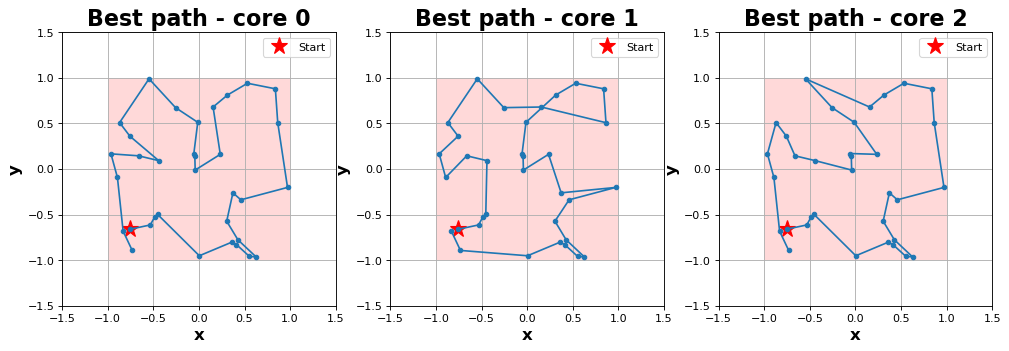

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


figure(figsize=(15, 5), dpi=80)

for i in range(0,3):
    plt.subplot(1,3,i+1)
    x,y = np.loadtxt("ex10/IndCont/cit/499citycoord"+str(i)+".out", usecols=(0,1), delimiter=' ', unpack='true')
    plt.plot(x[0],y[0], marker ="*", color = "r", markersize = 16, label = "Start", linestyle = "")
    plt.plot(x, y, marker = "o", markersize = 4, linestyle = "-")
    plt.ylabel('y', fontsize = 15, fontweight = "bold")
    plt.xlabel('x', fontsize = 15, fontweight = "bold")
    plt.grid(True)
    plt.title('Best path - core '+str(i), fontsize = 20, fontweight = "bold")
    plt.legend()

    rectangle = plt.Rectangle((-1,-1), 2, 2, fc='r', alpha = 0.15)
    plt.gca().add_patch(rectangle)

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.gca().set_aspect('equal', adjustable='box')

plt.show()